In [22]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import numpy as np
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# define baseline model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(num_pixels, input_shape=(num_pixels,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 3s - loss: 0.2814 - accuracy: 0.9193 - val_loss: 0.1424 - val_accuracy: 0.9584 - 3s/epoch - 9ms/step
Epoch 2/10
300/300 - 2s - loss: 0.1109 - accuracy: 0.9683 - val_loss: 0.0924 - val_accuracy: 0.9718 - 2s/epoch - 7ms/step
Epoch 3/10
300/300 - 2s - loss: 0.0705 - accuracy: 0.9798 - val_loss: 0.0800 - val_accuracy: 0.9772 - 2s/epoch - 8ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0514 - accuracy: 0.9854 - val_loss: 0.0677 - val_accuracy: 0.9796 - 2s/epoch - 7ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0368 - accuracy: 0.9894 - val_loss: 0.0654 - val_accuracy: 0.9784 - 2s/epoch - 7ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0257 - accuracy: 0.9933 - val_loss: 0.0669 - val_accuracy: 0.9789 - 2s/epoch - 7ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0195 - accuracy: 0.9951 - val_loss: 0.0587 - val_accuracy: 0.9818 - 2s/epoch - 6ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0140 - accuracy: 0.9968 - val_loss: 0.0572 - val_accuracy: 0.9827 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 2s 

In [23]:
X_test.shape

(10000, 784)

In [24]:
y_prediction = model.predict(X_test)
y_prediction = np.argmax(y_prediction, axis = 1)
y_test=np.argmax(y_test, axis=1)
result = confusion_matrix(y_test, y_prediction)
print(result)

313/313 [==============================] - 1s 2ms/step
[[ 970    1    2    0    1    1    2    1    2    0]
 [   0 1124    3    2    0    1    2    1    2    0]
 [   4    1 1016    1    1    0    2    4    2    1]
 [   0    0    5  989    0    5    0    4    3    4]
 [   0    1    3    0  970    0    3    1    0    4]
 [   2    0    0   10    1  871    3    2    3    0]
 [   3    3    0    1    2    4  945    0    0    0]
 [   0    5    7    1    0    0    0 1008    3    4]
 [   3    1    3    5    4    4    0    4  947    3]
 [   3    3    0    7   12    2    0    5    1  976]]


<Axes: >

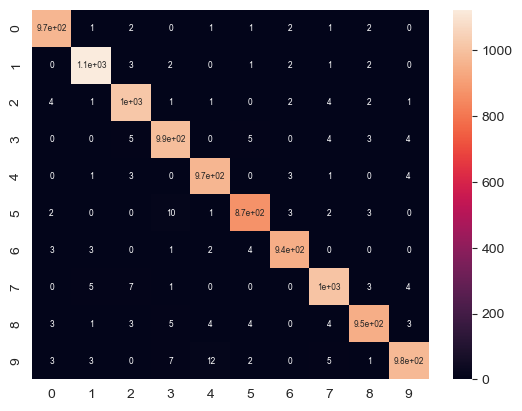

In [25]:
import seaborn as sns
sns.heatmap(result, annot=True, annot_kws={"size":6})

In [26]:
import numpy as np
x = model.predict(X_test[50:51])

1/1 [==============================] - 0s 28ms/step


<Axes: >

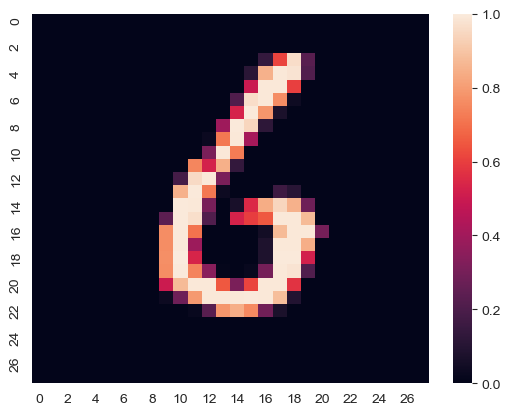

In [27]:
import seaborn as sns
sns.heatmap(X_test[50].reshape(28,28))

In [28]:
print(y_test[50])

6


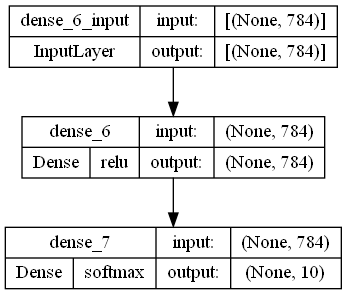

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_activations=True)